# **PARTIE #1 IMPORTATION LIBRARIES**

In [1]:
#calcul
import pandas as pd
import numpy as np
#datavisualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#dealing with various types of I/O
import io
import os

# **PARTIE #2 UPLOAD DATAFRAMES**

In [2]:
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
uploaded = files.upload()

Saving liaison.xlsx to liaison.xlsx
Saving web.xlsx to web.xlsx
Saving erp.xlsx to erp.xlsx


# **PARTIE #3 ÉTUDE DATAFRAMES**

## **3.1 DF ERP**

### **3.1.1 Analyse**

In [20]:
erp = pd.read_excel(io.BytesIO(uploaded['erp.xlsx']))

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [21]:
erp.shape

(825, 5)

In [22]:
erp.sample(10)

,product_id,onsale_web,price,stock_quantity,stock_status
300,4671,1,21.9,24,instock
570,5695,1,6.5,123,instock
494,5384,1,28.8,0,outofstock
57,4100,1,15.8,7,instock
410,4903,1,102.3,20,instock
162,4251,1,14.1,102,instock
104,4177,1,13.5,109,instock
159,4246,1,15.3,25,instock
238,4577,0,49.0,1,instock
386,4858,1,6.5,257,instock


In [23]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [24]:
erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [25]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

### **3.1.2** **Correction type**

In [26]:
#la variable "product_id" est considerée comme un 'int64'. En effet, elle devrait être considerée comme un 'object'
erp['product_id'] = erp['product_id'].astype(object)

In [27]:
erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

### **3.1.3 Sélection de données**

In [28]:
#création dun nouveau df 'ERP online' avec les produits vendus uniquement sur internet
erp_online = erp[erp.onsale_web == 1]
erp_online

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
787,6930,1,8.4,83,instock
792,7023,1,27.5,15,instock
793,7025,1,69.0,2,instock
822,7247,1,54.8,23,instock


In [29]:
erp_online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      717 non-null    object 
 1   onsale_web      717 non-null    int64  
 2   price           717 non-null    float64
 3   stock_quantity  717 non-null    int64  
 4   stock_status    717 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 33.6+ KB


### **3.1.4 Test clé primaire**

In [30]:
def doublons(df): # Nombre de doublons dans la dataframe
    print(len(df) - len(df.drop_duplicates()), 'doublons')

doublons(erp)

0 doublons


In [31]:
# Vérification de la clé primaire
def cle_primaire(df_cle): 
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')

cle_primaire(erp['product_id'])
cle_primaire(erp['onsale_web'])
cle_primaire(erp['price'])
cle_primaire(erp['stock_quantity'])

Clé primaire (0 doublon)
Pas une clé primaire ( 823 doublons )
Pas une clé primaire ( 444 doublons )
Pas une clé primaire ( 697 doublons )


## **3.2 DF LIAISON**

### **3.2.1 Analyse**

In [32]:
liaison = pd.read_excel(io.BytesIO(uploaded['liaison.xlsx']))

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [33]:
liaison.shape

(825, 2)

In [34]:
liaison.sample(10)

,product_id,id_web
536,5550,13958
352,4738,NaN
484,5068,15345
42,4079,13078
321,4698,NaN
222,4397,12639
83,4154,15141
3,4032,19814
473,5021,15630
807,7162,NaN


In [35]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [36]:
liaison.describe(include='all')

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


### **3.2.2 Renomer variable**

In [37]:
#Renomer la variable "id_web" pour "sku" sur le df 'Liaison' 
liaison = liaison.rename(columns={"id_web":"sku"})

In [38]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### **3.2.3 Les valeurs nulles**

In [39]:
liaison[liaison.isna().any(axis=1)]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [40]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [41]:
print(liaison.isnull().sum().sum())

91


### **3.2.4 Correction type**

In [42]:
#la variable "product_id" est considerée comme un 'int64'. En effet, elle devrait être considerée comme un 'object'
liaison['product_id'] = liaison['product_id'].astype(object)

### **3.2.5 Test clé primaire**

In [43]:
# Vérification de la clé primaire
def cle_primaire(df_cle): 
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')

cle_primaire(liaison['product_id'])
cle_primaire(liaison['sku'])

Clé primaire (0 doublon)
Pas une clé primaire ( 90 doublons )


## **3.3 DF WEB**


### **3.3.1 Analyse**

In [67]:
web = pd.read_excel(io.BytesIO(uploaded['web.xlsx']))
web.sample()

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1199,16155,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-05-17 12:35:04,...,domaine-la-croix-belle-cotes-de-thongue-blanc-...,2020-07-21 18:55:04,2020-07-21 16:55:04,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [68]:
web.shape

(1513, 28)

In [69]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [70]:
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


### **3.3.2 Les series inutiles**

In [71]:
# drop colonnes et création d'un nouveau df 
web_updated=web.drop(['virtual', 'downloadable', 'rating_count','average_rating', 'tax_class', 'post_author', 'post_date','post_date_gmt', 'post_content', 'post_title', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_password', 'post_modified', 'post_modified_gmt', 'post_content_filtered', 'post_parent', 'guid', 'menu_order', 'tax_status', 'post_mime_type', 'comment_count'],axis=1)

In [72]:
web_updated.shape

(1513, 4)

In [73]:
web_updated.sample(10)

,sku,total_sales,post_name,post_type
1383,15329,3.0,agnes-levet-cote-rotie-peroline-2017,attachment
303,15575,6.0,chateau-plaisance-fronton-2017,product
65,15339,0.0,zind-humbrecht-pinot-gris-roche-calcaire-2017,product
178,NaN,NaN,NaN,NaN
1375,15238,1.0,trimbach-muscat-reserve-2017,attachment
801,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,attachment
1387,13910,5.0,gilbert-picq-chablis-1er-cru-vaucoupin-2016,attachment
148,16567,0.0,augustin-collioure-blanc-adeodat-2019,product
744,15735,0.0,domino-romano-ribera-del-duero-rdr-2015,product
381,16255,4.0,chateau-ollieux-romanis-corbieres-rose-classiq...,product


### **3.3.3 Les doublons**

In [74]:
#le nombre de SKUs uniques référencés dans la DF
web_updated.sku.nunique()

714

In [75]:
web_updated.sample(10)

,sku,total_sales,post_name,post_type
170,16307,1.0,domaine-bulliat-morgon-colombier-2019,product
561,16121,5.0,albert-mann-riesling-albert-2017,product
330,16527,15.0,domaine-schoenheitz-pinot-noir-tradition-2019,product
97,14332,1.0,ollieux-romanis-monsieur-pinot-2017,product
526,15748,3.0,tempier-bandol-2017,product
713,15764,0.0,domaine-de-la-monardiere-vacqueyras-galejade-2018,product
260,812,0.0,marcel-windholtz-eau-de-vie-de-sureau,product
1044,16186,7.0,alphonse-mellot-sancerre-blanc-la-moussiere-2018,attachment
1430,15487,1.0,chateau-de-villeneuve-saumur-champigny-2017,attachment
1087,15280,0.0,domaine-rotier-gaillac-blanc-doux-les-gravels-...,attachment


In [76]:
#attachments??
web_updated[web_updated.post_type == 'attachment']

,sku,total_sales,post_name,post_type
799,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,attachment
800,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,attachment
801,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,attachment
802,19814,3.0,pierre-jean-villa-igp-gamine-2018,attachment
803,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,attachment
...,...,...,...,...
1508,16135,5.0,mouthes-le-bihan-aime-chai-2015,attachment
1509,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,attachment
1510,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,attachment
1511,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,attachment


In [77]:
web_updated[web_updated.post_type == 'product']

,sku,total_sales,post_name,post_type
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,product
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,product
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,product
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,product
4,19814,3.0,pierre-jean-villa-igp-gamine-2018,product
...,...,...,...,...
762,16135,5.0,mouthes-le-bihan-aime-chai-2015,product
767,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,product
768,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,product
797,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product


In [78]:
#enlever les doublons du df
web_updated_2=web_updated.loc[web_updated.duplicated(subset="sku", keep="last")==True].sort_values("post_type")
web_updated_2.head()

,sku,total_sales,post_name,post_type
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,product
494,14679,4.0,domaine-saint-nicolas-fiefs-vendeens-rouge-gra...,product
495,15526,4.0,pelle-menetou-salon-blanc-ratier-2018,product
496,16305,3.0,domaine-bulliat-beaujolais-blanc-2019,product
497,16306,1.0,domaine-bulliat-chiroubles-2019,product


In [79]:
web_updated_2.shape

(798, 4)

In [80]:
web_updated_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 795
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          714 non-null    object 
 1   total_sales  716 non-null    float64
 2   post_name    716 non-null    object 
 3   post_type    716 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.2+ KB


### **3.3.4 Les valeurs nulles**

In [81]:
#drop tous les valeurs nulles et création de la version definitive du df web
web_final=web_updated_2.dropna()
web_final

,sku,total_sales,post_name,post_type
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,product
494,14679,4.0,domaine-saint-nicolas-fiefs-vendeens-rouge-gra...,product
495,15526,4.0,pelle-menetou-salon-blanc-ratier-2018,product
496,16305,3.0,domaine-bulliat-beaujolais-blanc-2019,product
497,16306,1.0,domaine-bulliat-chiroubles-2019,product
...,...,...,...,...
248,15801,0.0,francois-bergeret-hautes-cotes-de-beaune-blanc...,product
249,15452,15.0,gilbert-picq-chablis-vosgros-1er-cru-2017,product
250,15038,10.0,gilbert-picq-chablis-vieilles-vignes-2017,product
225,3509,1.0,cognac-frapin-cigar-blend,product


In [82]:
web_final.sample(5)

,sku,total_sales,post_name,post_type
157,15032,8.0,domaine-saint-denis-bourgogne-rouge-le-clos-2017,product
191,15567,1.0,domaine-de-la-tour-du-bandol-en-sol-2017,product
54,15813,0.0,paul-ginglinger-riesling-drei-exa-2018,product
513,14819,0.0,domaine-chambeyron-vdp-viognier-2016,product
20,16029,10.0,clos-du-mont-olivet-cotes-du-rhone-vieilles-vi...,product


In [83]:
web_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          714 non-null    object 
 1   total_sales  714 non-null    float64
 2   post_name    714 non-null    object 
 3   post_type    714 non-null    object 
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


### **3.3.5 Test clé primaire**

In [84]:
web_final.head()

,sku,total_sales,post_name,post_type
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,product
494,14679,4.0,domaine-saint-nicolas-fiefs-vendeens-rouge-gra...,product
495,15526,4.0,pelle-menetou-salon-blanc-ratier-2018,product
496,16305,3.0,domaine-bulliat-beaujolais-blanc-2019,product
497,16306,1.0,domaine-bulliat-chiroubles-2019,product


In [85]:
# Vérification de la clé primaire
def cle_primaire(df_cle): 
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')

cle_primaire(web_final['sku'])
cle_primaire(web_final['total_sales'])
cle_primaire(web_final['post_name'])
cle_primaire(web_final['post_type'])

Clé primaire (0 doublon)
Pas une clé primaire ( 673 doublons )
Clé primaire (0 doublon)
Pas une clé primaire ( 713 doublons )


# **PARTIE #4 RAPPROCHEMENT**

## **4.1 Merge 'erp_online' et 'liaison'**

In [86]:
#Merge et vérification entre les dfs 'erp_online' et 'liaison'
erp_online_liaison=pd.merge(erp_online, liaison, on="product_id",indicator=True)
erp_online_liaison


,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
712,6930,1,8.4,83,instock,16135,both
713,7023,1,27.5,15,instock,15891,both
714,7025,1,69.0,2,instock,15887,both
715,7247,1,54.8,23,instock,13127-1,both


In [88]:
erp_online_liaison["_merge"].value_counts()

both          717
left_only       0
right_only      0
Name: _merge, dtype: int64

In [89]:
# Je supprime la série '_merge' afin de proceder le merge suivant
erp_online_liaison = erp_online_liaison.drop(['_merge'], axis=1)
erp_online_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
712,6930,1,8.4,83,instock,16135
713,7023,1,27.5,15,instock,15891
714,7025,1,69.0,2,instock,15887
715,7247,1,54.8,23,instock,13127-1


## **4.2 Merge entre 'erp_online_liaison' et 'web_final'**

In [90]:
# Merge et vérification entre les dfs 'erp_online_liaison" et 'web_final
df = pd.merge(erp_online_liaison, web_final, how='left', on="sku", indicator=True)
df

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,post_type,_merge
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,product,both
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,product,both
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,product,both
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,product,both
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,product,both
...,...,...,...,...,...,...,...,...,...,...
712,6930,1,8.4,83,instock,16135,5.0,mouthes-le-bihan-aime-chai-2015,product,both
713,7023,1,27.5,15,instock,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,product,both
714,7025,1,69.0,2,instock,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,product,both
715,7247,1,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,both


In [91]:
df["_merge"].value_counts()

both          714
left_only       3
right_only      0
Name: _merge, dtype: int64

In [92]:
#Je vérifie les 'left_only"
df_verif = df[df['_merge']=='left_only']
df_verif

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,post_type,_merge
228,4594,1,144.0,0,outofstock,NaN,NaN,NaN,NaN,left_only
449,5070,1,84.7,0,outofstock,NaN,NaN,NaN,NaN,left_only
450,5075,1,43.3,0,outofstock,NaN,NaN,NaN,NaN,left_only


In [93]:
#Je garde uniquement les articles qui ont une correspondance entre les identifiants
df_final = df[df['_merge']=='both']
df_final

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,post_type,_merge
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,product,both
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,product,both
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,product,both
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,product,both
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,product,both
...,...,...,...,...,...,...,...,...,...,...
712,6930,1,8.4,83,instock,16135,5.0,mouthes-le-bihan-aime-chai-2015,product,both
713,7023,1,27.5,15,instock,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,product,both
714,7025,1,69.0,2,instock,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,product,both
715,7247,1,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,both


In [94]:
#Je supprime la série "_merge"
df_final = df_final.drop(['_merge'], axis=1)
df_final

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,product
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,product
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,product
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,product
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,product
...,...,...,...,...,...,...,...,...,...
712,6930,1,8.4,83,instock,16135,5.0,mouthes-le-bihan-aime-chai-2015,product
713,7023,1,27.5,15,instock,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,product
714,7025,1,69.0,2,instock,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,product
715,7247,1,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product


# **PARTIE #5 CHIFFRE D'AFFAIRE**

## **5.1 Chiffre d'affaire par produit**

In [95]:
#Pour les calcules des CAs, je crée un nouveau df 'df_ca_produit'
#Selectionner les produits vendus sur Internet
df_ca_produit=(df_final[(df_final['onsale_web']==1)])
df_ca_produit.head()


,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,product
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,product
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,product
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,product
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,product


In [96]:
#Création de la série 'total_product_CA'
df_ca_produit["total_product_CA"] = df_ca_produit["total_sales"]*df_ca_produit["price"]
df_ca_produit.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,post_type,total_product_CA
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,product,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,product,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,product,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,product,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,product,0.0


In [97]:
#Creer un groupby. Cela permettra le calcule le CA pour chaque produit.
#Les références pour le groupby seront les series 'post_title' et 'total_product_CA"
df_ca_produit = df_ca_produit.groupby(by='post_name').agg({'total_product_CA':sum}).sort_values(by=['total_product_CA'], ascending=False)
df_ca_produit.head(60)

,total_product_CA
post_name,
champagne-gosset-grand-blanc-de-blanc,4704.0
champagne-gosset-grand-rose,4263.0
cognac-frapin-vip-xo,2288.0
champagne-gosset-grand-millesime-2006,1590.0
gosset-champagne-grande-reserve,1560.0
champagne-egly-ouriet-grand-cru-brut-blanc-de-noirs,1391.5
champagne-egly-ouriet-grand-cru-millesime-2008,1125.0
elian-daros-cotes-du-marmandais-clos-baquey-2015,1044.0
domaine-giudicelli-patrimonio-blanc-2019,1033.2


In [98]:
df_ca_produit.describe()

,total_product_CA
count,714.000000
mean,98.835574
std,307.685071
min,0.000000
25%,0.000000
50%,15.250000
75%,91.150000
max,4704.000000


## **5.2 Chiffre d'affaire total**

In [99]:
df_ca_total= (df_ca_produit['total_product_CA']).sum()
print("Le CA total du client sur Internet est de",df_ca_total," euros")

Le CA total du client sur Internet est de 70568.6  euros


# **PARTIE #6 REPRESENTATION GRAPHIQUE (PRICE OUTLIERS)**

## **6.1 Calcule de la** **moyenne, mode, std, valeur minimale, quartiles, valeur max, variance et skeweness**

In [100]:
df_final[["price"]].describe()

,price
count,714.000000
mean,32.493137
std,27.810525
min,5.200000
25%,14.100000
50%,23.550000
75%,42.175000
max,225.000000


In [101]:
#coefficient de variation (CV = (standard deviation/mean)*100)
cv = (27.810525/32.493137)
cv

0.8558891990022386

In [102]:
df_final["price"].mode()

0    19.0
Name: price, dtype: float64

In [103]:
round(df_final["price"].var(ddof=0),2)

772.34

In [104]:
round(df_final["price"].skew(),2)

2.58

## **6.2 Les valeurs atypique**

### **6.2.1 Le maximum et le minimum statistique**

In [105]:
Q1 = df_final["price"].quantile(q=0.25, interpolation="midpoint")
Q3 = df_final["price"].quantile(q=0.75, interpolation="midpoint")


In [106]:
Iq=Q3-Q1
Iq

28.050000000000004

In [107]:
# calcul minimum statistique
bn_outliers_inf = Q1-1.5*Iq
print(f'minimum statistique : {bn_outliers_inf}')


minimum statistique : -27.975


In [108]:
#calcul maximum statistique
bn_outliers_sup = Q3+1.5*Iq
print(f'maximum statistique : {bn_outliers_sup}')

maximum statistique : 84.22500000000001


In [109]:
# valeurs dont le prix est supérieur au maximum statistique
df_maxstat = df_final[df_final['price'] > bn_outliers_sup]
print(f'nombre de valeurs avec des prix supérieurs aux maximum statistique : {df_maxstat.shape[0]}')

nombre de valeurs avec des prix supérieurs aux maximum statistique : 32


## **6.3** **Boxplot**

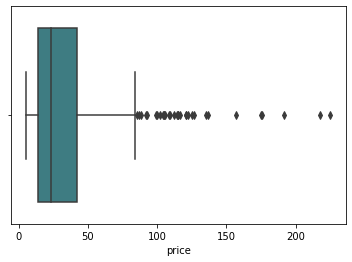

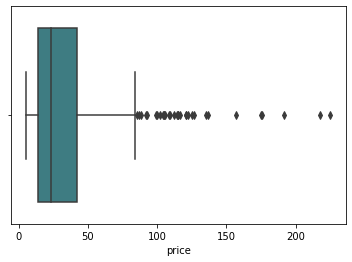

In [110]:
df_boxplot = sns.boxplot(x=df_final["price"],palette="crest")
df_boxplot.figure

In [111]:
fig = px.box(df_final, x="price", 
points="all",
 title=" répartition des prix produit")
fig.show()

## **6.4 Les valeurs à analyser**

In [113]:
#les valeurs atypiques
df_maxstat.sort_values("price", ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,post_type
199,4352,1,225.0,0,outofstock,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,product
427,5001,1,217.5,20,instock,14581,0.0,david-duband-charmes-chambertin-grand-cru-2014,product
590,5892,1,191.3,10,instock,14983,3.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,product
218,4402,1,176.0,8,instock,3510,13.0,cognac-frapin-vip-xo,product
556,5767,1,175.0,12,instock,15185,0.0,camille-giroud-clos-de-vougeot-2016,product
221,4406,1,157.0,3,instock,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,product
382,4904,1,137.0,13,instock,14220,5.0,domaine-des-croix-corton-charlemagne-grand-cru...,product
645,6126,1,135.0,10,instock,14923,2.0,champagne-gosset-celebris-vintage-2007,product
201,4355,1,126.5,2,instock,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,product
514,5612,1,124.8,12,instock,14915,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,product
